<a href="https://colab.research.google.com/github/sammyfow/cap-comp215/blob/2024.01/midterm_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 Mid-term Practice Questions   Spring 2024

Some additional practice questions for the mid-term exam.

NOTE: these questions are similar in format to the mid-term exam, but the questions on the exam will not be exactly like these and may cover topics not covered by these practice questions.  I.e., this is not the only thing you need to study!

### Topics:
 - Data structures:  list, dictionary, class, graph, 1D array
 - Algorithms: graph traversal, matrix operators (numpy), sliding dot-product (correlation)
 - Techniques: list comprehension, generators, random numbers, plotting
 - Concepts: Counting, Big-O analysis of algorithm time complexity

As usual, we start with module imports...

In [2]:
import itertools
from dataclasses import dataclass
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from collections import defaultdict

## Structured Data
The `close_approaches` data below was fetched from Nasa's [Near Earth Objects](https://cneos.jpl.nasa.gov/)
API.

It is a (partial) list of information about times that a particular NEO has made a close approach to some planet.

In [3]:
close_approaches = [
 {'close_approach_date': '1900-10-30',
  'close_approach_date_full': '1900-Oct-30 21:15',
  'epoch_date_close_approach': -2182819500000,
  'miss_distance': {'astronomical': '0.4183489295',
                    'kilometers': '62584108.769980165',
                    'lunar': '162.7377335755',
                    'miles': '38887961.930909677'},
  'orbiting_body': 'Earth',
  'relative_velocity': {'kilometers_per_hour': '30027.9641223136',
                        'kilometers_per_second': '8.3411011451',
                        'miles_per_hour': '18658.2091514453'}
 },
 {'close_approach_date': '1901-06-26',
  'close_approach_date_full': '1901-Jun-26 20:27',
  'epoch_date_close_approach': -2162172780000,
  'miss_distance': {'astronomical': '0.0308795665',
                    'kilometers': '4619517.374923355',
                    'lunar': '12.0121513685',
                    'miles': '2870434.992938099'},
  'orbiting_body': 'Earth',
  'relative_velocity': {'kilometers_per_hour': '33429.0066078308',
                        'kilometers_per_second': '9.2858351688',
                        'miles_per_hour': '20771.4846891824'}
 },
 {'close_approach_date': '1907-01-08',
  'close_approach_date_full': '1907-Jan-08 04:37',
  'epoch_date_close_approach': -1987528980000,
  'miss_distance': {'astronomical': '0.1240285628',
                    'kilometers': '18554408.814041236',
                    'lunar': '48.2471109292',
                    'miles': '11529175.0220956168'},
  'orbiting_body': 'Venus',
  'relative_velocity': {'kilometers_per_hour': '24041.8395567329',
                        'kilometers_per_second': '6.6782887658',
                        'miles_per_hour': '14938.6641401266'}
 },
 {'close_approach_date': '1907-09-06',
  'close_approach_date_full': '1907-Sep-06 10:51',
  'epoch_date_close_approach': -1966684140000,
  'miss_distance': {'astronomical': '0.4147265741',
                    'kilometers': '62042212.117757167',
                    'lunar': '161.3286373249',
                    'miles': '38551242.9650842246'},
  'orbiting_body': 'Earth',
  'relative_velocity': {'kilometers_per_hour': '26520.1894310292',
                        'kilometers_per_second': '7.3667192864',
                        'miles_per_hour': '16478.6143717415'}
 },
 {'close_approach_date': '1909-08-06',
  'close_approach_date_full': '1909-Aug-06 06:41',
  'epoch_date_close_approach': -1906219140000,
  'miss_distance': {'astronomical': '0.1317215629',
                    'kilometers': '19705265.242911023',
                    'lunar': '51.2396879681',
                    'miles': '12244284.0469491974'},
  'orbiting_body': 'Venus',
  'relative_velocity': {'kilometers_per_hour': '7812.3369916648',
                        'kilometers_per_second': '2.1700936088',
                        'miles_per_hour': '4854.2823935153'}
 },
]

### Q.1  (2 points)
Use a **list comprehension** to define a list of close approach dates that came within 10M km of the planet.
*Hint*: there is just 1 such approach in the list above.

In [4]:
# Solution for Q.1 here
Near_Miss_Dates = [date['close_approach_date'] for date in close_approaches
                   if float(date['miss_distance']['kilometers']) < 10**7]
print(Near_Miss_Dates)

['1901-06-26']


### Q.2  (3 points)
Develop a `dict` with a count of the number of close approaches for each `orbiting_body`.
There are *many* different ways to approach this - for full points solution should be concise and easy to understand.

*Tip*: the built-in [defaultdict(int)](https://docs.python.org/3/library/collections.html#collections.defaultdict) could help here.

In [13]:
# Solution  for Q.2 here
s = [orb['orbiting_body'] for orb in close_approaches]
d = defaultdict(int)
for k in s:
  d[k] += 1
print(dict(d))

{'Earth': 3, 'Venus': 2}


### Q.3  (3 points)
Plot your approaches-by-planet data as a [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) chart.
(no need to label axes or add a chart title)
*Hint*:  your dictionary has `.keys()` and  `.values()`.

<BarContainer object of 2 artists>

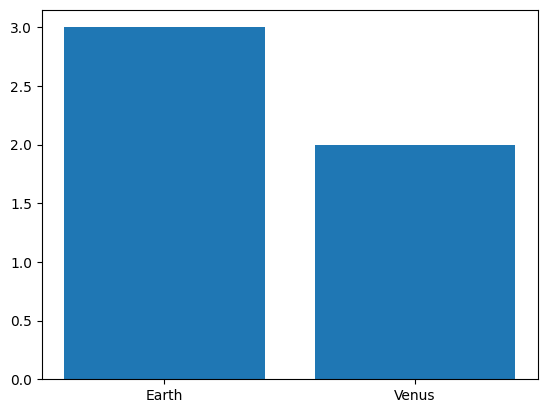

In [6]:
# Solution for Q.3 here
plt.bar(d.keys(), d.values())

## Classes
Develop a small class to represent a single `CloseApproach` object, with its date, orbiting body, and miss distance in km.
You may use `@dataclass` or a regular class, as you wish.

Your class should define at least 2 methods:
```
  def __str__(self) : return a nicely formatted string with the approach date and orbiting body

  def has_same_planet(self, other) : return True iff this approach and the other were for the same `orbiting_body`
```

### Q.4   (5 points)
Write your class below and include some code to test it and both its methods.

In [7]:
# Solution for Q. 4 here
class CloseApproach:

  def __init__(self, date, orb, misskm):
    self.date = date
    self.orb = orb
    self.misskm = misskm

  def __str__(self):
    nl = '\n'
    return f'approach date: {self.date}{nl}orbiting body: {self.orb}'

  def has_same_planet(self, other):
    return self.orb == other.orb

test = CloseApproach('03/06/2024', 'Earth', 10000)
test1 = CloseApproach('03/06/2024', 'Earth', 300)
test2 = CloseApproach('03/06/2024', 'Krypton', 300)

print(test.has_same_planet(test1))
print(test.has_same_planet(test2))

True
False


## 1D Sliding Dot-product (correlation)
The array below represents the size (in sq. m) of each house along a given street.
In the questions below, we are trying to understand how each house compares to its next-door neighbours.

In [8]:
house_sizes = np.array( [251, 110, 92, 189, 215, 142, 126, 268, 243, 194] )
wrapped_sizes = np.pad(house_sizes, 1, mode='wrap')

### Q.5  (3 points)
Compute the average size of each house's 2 next-door neighbours using `np.correlate` [https://numpy.org/doc/stable/reference/generated/numpy.correlate.html](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)
To avoid edge effects, we assume the last house is next-door to first house (a circular block)
  `wrapped_sizes` shows how to use `numpy.pad` to do this [https://numpy.org/devdocs/reference/generated/numpy.pad.html](https://numpy.org/devdocs/reference/generated/numpy.pad.html)

In [9]:
# Solution for Q.5 here
kernel = np.array([1, 0, 1])
neighbours = np.correlate(wrapped_sizes, kernel) / 2
print(neighbours)

[152.  171.5 149.5 153.5 165.5 170.5 205.  184.5 231.  247. ]


### Q.6  (2 points)
Compute the "variance" (difference) between each house's size and the average of it's neighbours.
For full points, you must do this using a vector operation rather than a loop or comprehension.
*Hint*: As a check on your work, the sum of all variances should be zero.

In [10]:
# Solution for Q.6 here
variance = house_sizes - neighbours
print(variance)
print(sum(variance))

[ 99.  -61.5 -57.5  35.5  49.5 -28.5 -79.   83.5  12.  -53. ]
0.0


## Graph Connectivity
Assume you have been tasked with writing an algorithm to determine if an undirected graph is connected:
```
   def is_connected(graph)
```
with this in mind, answer the following questions (*you need not actually write this function, its just for context*)...

### Q.7  (2 points)
 i) What is the smallest number of edges a connected undirected graph with $N$ nodes could have?
 ii) What is the largest number of edges a simple undirected graph with $N$ nodes could have? (no edges from a node to itself)

Q.7 answer: a connected undirected graph with N nodes could have as few as N edges.

a connected undirected graph with N nodes could have as many as N(N-1)/2 edges

### Q.8  (2 points)

Give an undirected graph with $N$ nodes and $M$ edges...
(i) what is the best-case time complexity for the `is_connected` algorithm?
(ii) what is the worst-case time complexity of the `is_connected` algorithm?

Choices:
 * $O(N)$
 * $O(M)$
 * $O(N + M)$
 * $O(N * M)$
 * $O(N^2)$
 * $O(2^N)$

Q.8 answer:

## Iterable types

The code fragment below defines a list, a tuple and a generator, all containing the same sequence of values...

In [11]:
l = [(i-1, i, i+1) for i in range(10)]
t = tuple((i-1, i, i+1) for i in range(10))
g = ((i-1, i, i+1) for i in range(10))

type(l), type(t), type(g)

(list, tuple, generator)

### Q.9   (3 points)
Write a small piece of code that clearly demonstrates the principle difference(s) between these 3 iterable objects.

In [12]:
# Solution for Q.9 here
print(l)
l[0:] = 'lists are mutable'
print(l)

print(t)
#t[0] = tuples are immutable so this raises an error

print(next(g))
print(next(g))
print(list(g))



[(-1, 0, 1), (0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
['l', 'i', 's', 't', 's', ' ', 'a', 'r', 'e', ' ', 'm', 'u', 't', 'a', 'b', 'l', 'e']
((-1, 0, 1), (0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10))
(-1, 0, 1)
(0, 1, 2)
[(1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
